# Classification
- Classification with the Variational Quantum Classifier (VQC)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms import VQC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
feature_map = ZZFeatureMap(feature_dimension=4, reps=1)
ansatz = RealAmplitudes(num_qubits=4, entanglement="linear", reps=1)
optimizer = COBYLA(maxiter=30)

In [5]:
vqc = VQC(feature_map=feature_map, ansatz=ansatz, loss="cross_entropy", optimizer=optimizer)

In [6]:
vqc.fit(X_train, y_train)

Classifier accuracy: 0.67
Precision: 0.69
Recall: 0.67


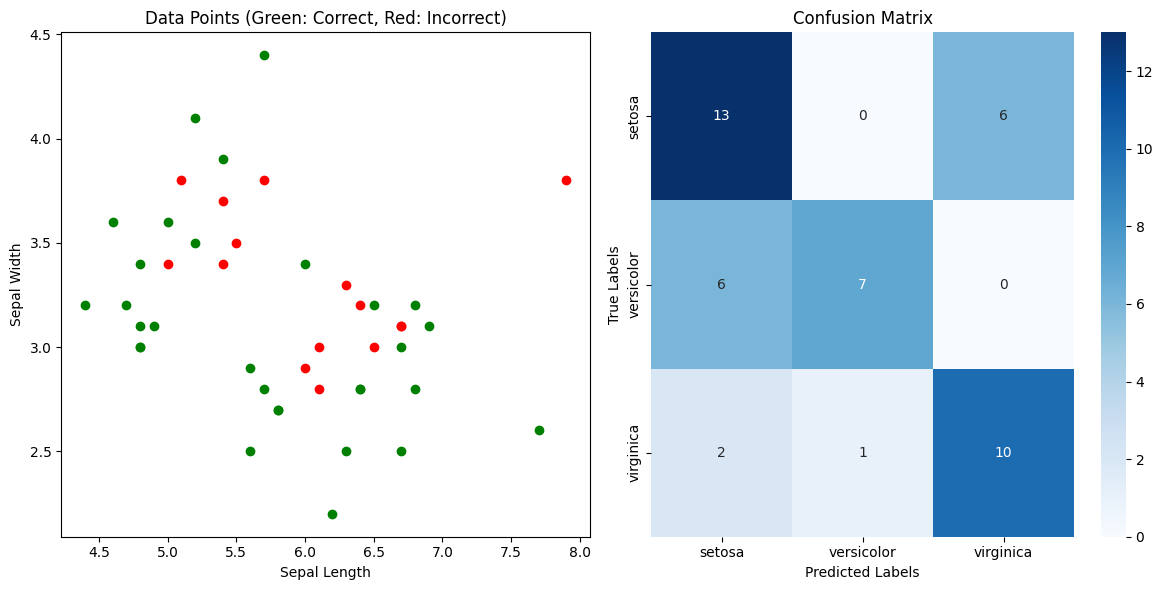

In [7]:
def evaluate_classifier(vqc, X_test, y_test, target_names=None):
    score = vqc.score(X_test, y_test)
    print(f"Classifier accuracy: {score:.2f}")
    y_predict = vqc.predict(X_test)
    precision = precision_score(y_test, y_predict, average='weighted')
    print(f"Precision: {precision:.2f}")
    recall = recall_score(y_test, y_predict, average='weighted')
    print(f"Recall: {recall:.2f}")
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    for i in range(len(X_test)):
        if y_test[i] == y_predict[i]:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
        else:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Data Points (Green: Correct, Red: Incorrect)')

    plt.subplot(1, 2, 2)
    conf_mat = confusion_matrix(y_test, y_predict)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

evaluate_classifier(vqc, X_test, y_test, target_names=iris.target_names)


# Regression
   - Regression with the Variational Quantum Regressor (VQR)

In [8]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import PauliFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers  import L_BFGS_B
from qiskit_machine_learning.algorithms import VQR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import clear_output

In [9]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [10]:
stock_data = yf.download("AAPL", start="2021-01-01", end="2021-12-31")

X = np.array(stock_data['Close']).reshape(-1, 1)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

[*********************100%%**********************]  1 of 1 completed


In [11]:
feature_map = PauliFeatureMap(feature_dimension=1, reps=2, paulis=['Z'])
ansatz = RealAmplitudes(num_qubits=1, entanglement="linear", reps=3) 

In [12]:
objective_func_vals = []  
vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=100),  
    callback=callback_graph,
)

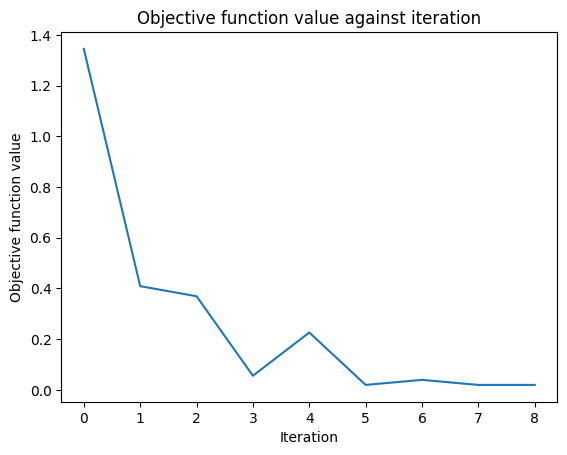

In [13]:
vqr.fit(X_train, X_train)

In [14]:
score = vqr.score(X_test, X_test)
print(f"Regressor score: {score}")

Regressor score: 0.6411505644543656
